In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

Decoding reviews back to text

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


Preparing the data
Encoding the integer sequences via multi-hot encoding

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


Building your model
Model definition

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])



Applying regularizations

In [14]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Adding dropout

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


Adding reguralization and dropout together

In [9]:
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dense, Dropout

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
             metrics=["accuracy"])

In [ ]:
#from keras import optimizers
#model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              #loss="binary_crossentropy",
              #metrics=["accuracy"])

Validating your approach
Setting aside a validation set

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


Training your model

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6483 - accuracy: 0.6197 - val_loss: 0.5587 - val_accuracy: 0.8311
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5492 - accuracy: 0.7384 - val_loss: 0.4499 - val_accuracy: 0.8638
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4680 - accuracy: 0.7989 - val_loss: 0.3807 - val_accuracy: 0.8771
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4064 - accuracy: 0.8356 - val_loss: 0.3292 - val_accuracy: 0.8777
Epoch 5/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3459 - accuracy: 0.8665 - val_loss: 0.2928 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3080 - accuracy: 0.8867 - val_loss: 0.2914 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2755 - accuracy: 0.9017 - val_loss: 0.2754 - val_accuracy: 0.8899
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss


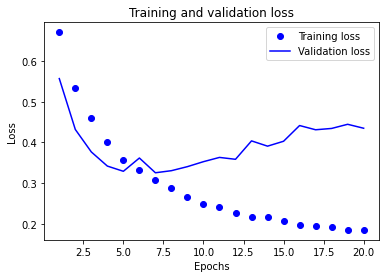

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

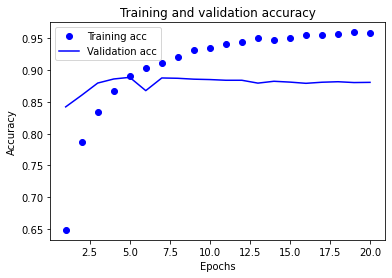

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**


In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4550 - accuracy: 0.8171
Epoch 2/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2702 - accuracy: 0.9023
Epoch 3/4
49/49 [==============================] - 2s 50ms/step - loss: 0.2136 - accuracy: 0.9228
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2852 - accuracy: 0.8854


In [ ]:
#model = Sequential()
#model.add(Dense(16, activation='relu', input_shape=(10000,)))
#model.add(Dropout(0.5))
#model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(1, activation='sigmoid'))

#model.compile(optimizer="rmsprop",
              #loss="binary_crossentropy",
              #metrics=["accuracy"])
#model.fit(x_train, y_train, epochs=7, batch_size=512)
#results = model.evaluate(x_test, y_test)

In [ ]:
#model = keras.Sequential([
    #layers.Dense(64, activation="relu"),
    #layers.Dense(64, activation="relu"),
    #layers.Dense(1, activation="sigmoid")
#])
#model.compile(optimizer="rmsprop",
              #loss="binary_crossentropy",
             # metrics=["accuracy"])
#model.fit(x_train, y_train, epochs=4, batch_size=512)
#results = model.evaluate(x_test, y_test)

In [ ]:
#model = models.Sequential()
#model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01), activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer='rmsprop',
              #loss='binary_crossentropy',
              #metrics=['accuracy'])

#model.fit(x_train, y_train, epochs=15, batch_size=512)
#results = model.evaluate(x_test, y_test)

In [ ]:
results

[0.28787553310394287, 0.8857600092887878]

In [ ]:
model.predict(x_test)